In [1]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.engine.topology import Layer,InputSpec
from keras.layers import Input
from keras.models import Model

K.set_image_dim_ordering("th")

class CNN:
    @staticmethod
    def build(timeSteps,variables,classes):
        
        inputNet = Input(shape=(1,timeSteps,variables)) 
        conv1=Conv2D(20, (5,5), padding="same")(inputNet)
        conv1=AveragePooling2D(pool_size=(2, 1), strides=(2, 1))(conv1)
        conv1=Dropout(0.05)(conv1)
        conv2=Conv2D(50,(5,5), padding="same")(conv1)
        conv2=AveragePooling2D(pool_size=(2, 1), strides=(2, 1))(conv2)
        out1=Dropout(0.05)(conv2)
        flat=Flatten()(out1)
        denselayers=Dense(400)(flat)
        denselayers=Activation("relu")(denselayers)
        denselayers=Dropout(0.15)(denselayers)
        denselayers=Dense(150)(denselayers)
        denselayers=Activation("relu")(denselayers)
        denselayers=Dropout(0.15)(denselayers)
        # a softmax classifier
        classificationLayer=Dense(classes)(denselayers)
        classificationLayer=Activation("softmax")(classificationLayer)
        
        model=Model(inputNet,classificationLayer)
        return model


/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rjpg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
# load data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

def non_shuffling_train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) + 1
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

# load all data
#dfin = pd.read_csv('windows-size72-step12.csv',header=None)  #inputs 72 lines per sample
#dfout = pd.read_csv('out-class-size72-step12.csv',header=None)  #output classes 
dfin = pd.read_csv('windows-size168-step24-Normalized.csv',header=None)  #inputs 72 lines per sample
dfout = pd.read_csv('out-class-size168-step24-norm.csv',header=None)  #output classes 

total_inputs,total_output = dfin.as_matrix().astype(np.float32),dfout.as_matrix().astype(np.int32)

# normalize
scaler = MinMaxScaler(feature_range=(0, 1))
total_inputs = scaler.fit_transform(total_inputs)

# every 72 lines is one input sample
total_inputs = np.reshape(total_inputs, (-1,168,8))
#total_inputs = np.reshape(total_inputs, (-1,7,24,8))

print("############# total shapes #############")
print(total_inputs.shape)
print(total_output.size)

train_inputs, test_inputs, train_output, test_output = non_shuffling_train_test_split(total_inputs, total_output, test_size=0.2)
print("############# train shapes #############")
print(train_inputs.shape)
print(train_output.shape)

print("############# test shapes #############")
print(test_inputs.shape)
print(test_output.shape)




/home/rjpg/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


############# total shapes #############
(1432, 168, 8)
1432
############# train shapes #############
(1146, 168, 8)
(1146, 1)
############# test shapes #############
(286, 168, 8)
(286, 1)


/home/rjpg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:

IMG_ROWS, IMG_COLS = 168, 8 # input image dimensions
NB_CLASSES = 5  # number of outputs = number of classes

X_train = train_inputs[:, np.newaxis, :, :]
y_train = np_utils.to_categorical(train_output, NB_CLASSES)
X_test = test_inputs[:, np.newaxis, :, :]
y_test = np_utils.to_categorical(test_output, NB_CLASSES)
print(y_test.shape)

OPTIMIZER = Adam()

#model = CNN.build(timeSteps=IMG_ROWS,variables=IMG_COLS,classes=NB_CLASSES)
model = CNN.build(timeSteps=28,variables=28,classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

model.summary()


(286, 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 168, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 168, 8)        520       
_________________________________________________________________
average_pooling2d_1 (Average (None, 20, 84, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 84, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 84, 8)         25050     
_________________________________________________________________
average_pooling2d_2 (Average (None, 50, 42, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 42, 8)         0         
_

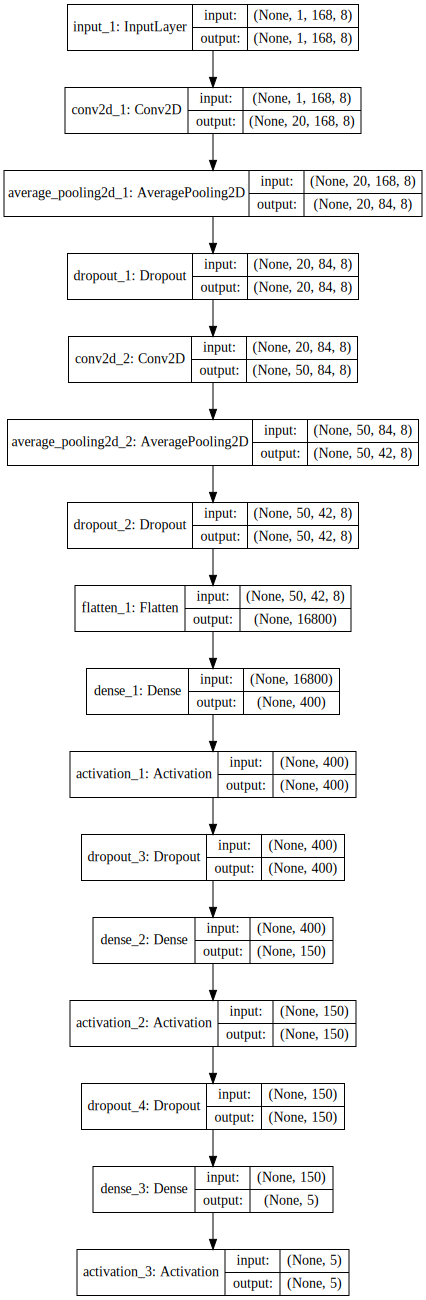

In [4]:
from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot
modelSVG=SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
display(modelSVG)

In [5]:
NB_EPOCH = 100
BATCH_SIZE = 64
VERBOSE = 1

#tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
#esCallBack = EarlyStopping(monitor='val_acc', min_delta=0, patience=12, verbose=0, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01,patience=5, min_lr=0.0001)
best_checkpoint = ModelCheckpoint('CNN-energie.h5', monitor='val_acc', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=1, # 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
		validation_data=(X_test,y_test),
		#validation_split=VALIDATION_SPLIT,
		callbacks=[reduce_lr,best_checkpoint])

Train on 1146 samples, validate on 286 samples
Epoch 1/100
1146/1146 [==============================] - 3s 3ms/step - loss: 1.4799 - acc: 0.3316 - val_loss: 1.3867 - val_acc: 0.3531

Epoch 00001: val_acc improved from -inf to 0.35315, saving model to CNN-energie.h5
Epoch 2/100
1146/1146 [==============================] - 0s 299us/step - loss: 1.2446 - acc: 0.4607 - val_loss: 1.3134 - val_acc: 0.3846

Epoch 00002: val_acc improved from 0.35315 to 0.38462, saving model to CNN-energie.h5
Epoch 3/100
1146/1146 [==============================] - 0s 305us/step - loss: 1.1926 - acc: 0.4921 - val_loss: 1.3462 - val_acc: 0.3986

Epoch 00003: val_acc improved from 0.38462 to 0.39860, saving model to CNN-energie.h5
Epoch 4/100
1146/1146 [==============================] - 0s 294us/step - loss: 1.1268 - acc: 0.5262 - val_loss: 1.3415 - val_acc: 0.3881

Epoch 00004: val_acc did not improve from 0.39860
Epoch 5/100
1146/1146 [==============================] - 0s 298us/step - loss: 1.0188 - acc: 0.582

1146/1146 [==============================] - 0s 307us/step - loss: 0.0097 - acc: 0.9983 - val_loss: 3.8346 - val_acc: 0.3846

Epoch 00086: val_acc did not improve from 0.40909
Epoch 87/100
1146/1146 [==============================] - 0s 313us/step - loss: 0.0101 - acc: 0.9983 - val_loss: 3.8520 - val_acc: 0.3776

Epoch 00087: val_acc did not improve from 0.40909
Epoch 88/100
1146/1146 [==============================] - 0s 305us/step - loss: 0.0107 - acc: 0.9974 - val_loss: 3.8931 - val_acc: 0.3671

Epoch 00088: val_acc did not improve from 0.40909
Epoch 89/100
1146/1146 [==============================] - 0s 308us/step - loss: 0.0082 - acc: 0.9991 - val_loss: 3.8621 - val_acc: 0.3741

Epoch 00089: val_acc did not improve from 0.40909
Epoch 90/100
1146/1146 [==============================] - 0s 310us/step - loss: 0.0086 - acc: 0.9974 - val_loss: 3.9420 - val_acc: 0.3741

Epoch 00090: val_acc did not improve from 0.40909
Epoch 91/100
1146/1146 [==============================] - 0s 309us/s

In [6]:
import json,codecs
import numpy as np
def saveHist(path,history):

    new_hist = {}
    for key in list(history.history.keys()):
        if type(history.history[key]) == np.ndarray:
            new_hist[key] == history.history[key].tolist()
        elif type(history.history[key]) == list:
           if  type(history.history[key][0]) == np.float64:
               new_hist[key] = list(map(float, history.history[key]))

    #print(new_hist)
    with codecs.open(path, 'w', encoding='utf-8') as f:
        json.dump(new_hist, f, separators=(',', ':'), sort_keys=True, indent=4) 

def loadHist(path):
    with codecs.open(path, 'r', encoding='utf-8') as f:
        n = json.loads(f.read())
    return n


saveHist('CNN-energie.hist',history)
hist=loadHist('CNN-energie.hist')




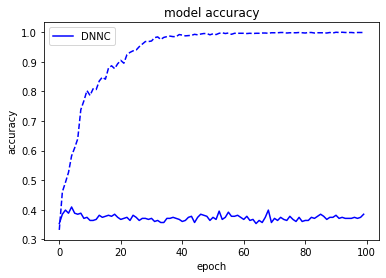

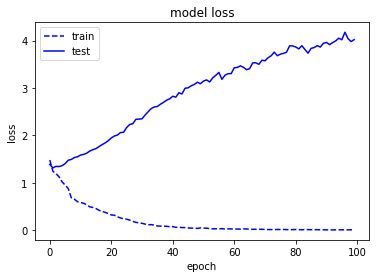

In [7]:
import matplotlib.pylab as plt

acc=np.array(hist['acc'])
#acc=acc[0:100]
#acc=np.append(acc,[0.7])
plt.plot(acc,'b--')
plt.plot(hist['val_acc'],'b',label='DNNC')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()
# summarize history for loss
loss=np.array(hist['loss'])
#loss=np.append(loss,[2])
plt.plot(loss,'b--',label='train')
plt.plot(hist['val_loss'],'b',label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()